In [1]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$
### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)- \frac{3 b^2 \Omega_{de}}{a} \,
$$
### for the simple holographic dark energy model (without interaction) is just the case $b = 0$.
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)
$$

In [2]:
#Right hand side of the equations
def RHS_a_hde1(Omega, a, c=0.8, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root1(Omega_0 , c=0.8, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 300)
    result_a_hde1 = odeint(RHS_a_hde1, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde1[-1] - Ode0

s1 = optimize.newton(fun_root1, 1)
#s2 = optimize.newton(fun_root2, 1)
#s3 = optimize.newton(fun_root3, 1)
#s4 = optimize.newton(fun_root4, 1)
#s5 = optimize.newton(fun_root5, 1)

In [3]:
def RHS_a_hde2(Omega, a, c=0.9, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def RHS_a_hde3(Omega, a, c=1.0, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def RHS_a_hde4(Omega, a, c=1.2, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega
def RHS_a_hde5(Omega, a, c=1.5, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega


'''
root 
'''
def fun_root2(Omega_0 , c=0.9, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hde = odeint(RHS_a_hde2, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde[-1] - Ode0


def fun_root3(Omega_0 , c=1.0, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hde = odeint(RHS_a_hde3, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde[-1] - Ode0

def fun_root4(Omega_0 , c=1.2, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hde = odeint(RHS_a_hde4, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde[-1] - Ode0

def fun_root5(Omega_0 , c=1.5, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hde = odeint(RHS_a_hde5, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde[-1] - Ode0

s2 = optimize.newton(fun_root2, 1)
s3 = optimize.newton(fun_root3, 1)
s4 = optimize.newton(fun_root4, 1)
s5 = optimize.newton(fun_root5, 1)

The initial value at z=3 is  0.08395681980132573


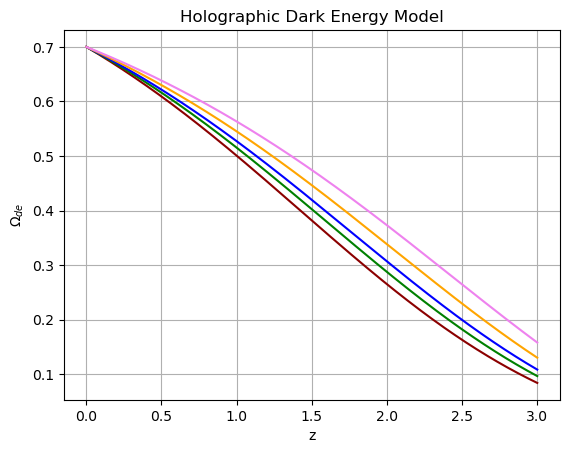

In [4]:
z_eff = np.linspace(3,0,500)

O_hde1 =odeint(RHS_a_hde1, s1*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.8,0))
O_hde2 =odeint(RHS_a_hde2, s2*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.9,0))
O_hde3 =odeint(RHS_a_hde3, s3*10**(-5), np.linspace(1./(1+3), 1, 500), args=(1.0,0))
O_hde4 =odeint(RHS_a_hde4, s4*10**(-5), np.linspace(1./(1+3), 1, 500), args=(1.2,0))
O_hde5 =odeint(RHS_a_hde5, s5*10**(-5), np.linspace(1./(1+3), 1, 500), args=(1.5,0))

plt.plot(z_eff,O_hde1,color='darkred',)
plt.plot(z_eff,O_hde2,color='green',)
plt.plot(z_eff,O_hde3,color='blue',)
plt.plot(z_eff,O_hde4,color='orange',)
plt.plot(z_eff,O_hde5,color='violet',)

plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(O_hde1[0]))

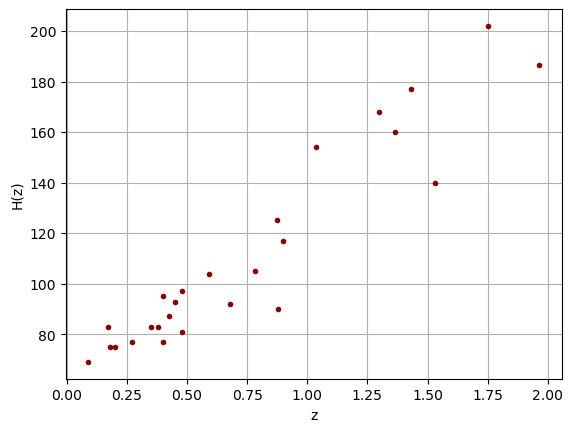

In [5]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]
plt.errorbar(z_obs,hub_obs, ls='', marker='.',color='darkred')
plt.xlabel('z')
plt.ylabel('H(z)')
plt.grid()

In [6]:
'''
Now we define the Hubble paramter for the Holographic model
'''
Om= 0.3
Or= 0.0001
Ok=0.01
Oe= 1 - Om - Or - Ok
H0 = 70
    
z0 = 3
def RHSquared_z1(z):
        if (z < z0).all :
            Ode1 =  (1-Om-Ok)
        else:
            Ode1 = O_hde1(z)

        return H0*np.sqrt(Or*(z+1)**4 + Om*(1+z)**3 + Ok*(z+1)**2 + Ode1)




Hub_hde1 = RHSquared_z1(z_obs)
Hub_hde1

array([ 73.09993984,  76.17982288,  76.54528432,  77.37098953,
        80.45141278,  84.29148252,  85.6800242 ,  86.67526974,
        86.6955469 ,  87.93999821,  89.24596264,  90.77144377,
        90.86316519,  97.21593632, 102.43729766, 108.83828407,
       115.10544403, 115.44684713, 116.82039946, 126.56059647,
       146.76311597, 151.87402006, 157.41765668, 165.89245714,
       185.34020756, 205.34515751])

In [9]:
def RHSquared_z2(z):
        if (z < z0).any :
            Ode2 =  (1-Om-Ok)
        else:
            Ode2 = O_hde2(z)

        return H0*np.sqrt(Or*(z+1)**4 + Om*(1+z)**3 + Ok*(z+1)**2 + Ode2)


Hub_hde2 = RHSquared_z2(z_obs)
Hub_hde2

array([ 73.09993984,  76.17982288,  76.54528432,  77.37098953,
        80.45141278,  84.29148252,  85.6800242 ,  86.67526974,
        86.6955469 ,  87.93999821,  89.24596264,  90.77144377,
        90.86316519,  97.21593632, 102.43729766, 108.83828407,
       115.10544403, 115.44684713, 116.82039946, 126.56059647,
       146.76311597, 151.87402006, 157.41765668, 165.89245714,
       185.34020756, 205.34515751])

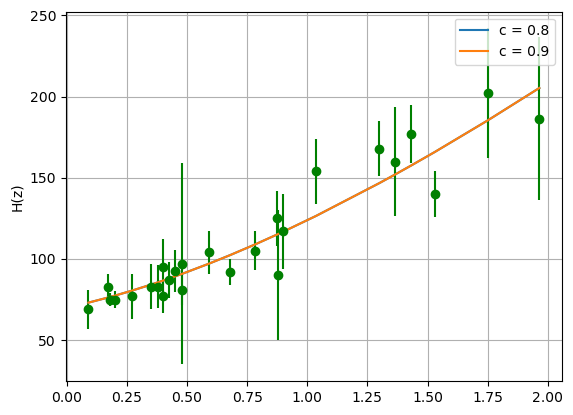

In [10]:
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_obs,Hub_hde1, label='c = 0.8')
plt.plot(z_obs,Hub_hde2, label='c = 0.9')
#plt.plot(z_obs,Hub_hde3, label='c = 1.0')
#plt.plot(z_obs,Hub_hde4, label='c = 1.2')
#plt.plot(z_obs,Hub_hde5, label='c = 1.5')
plt.ylabel('H(z)')
#plt.plot(redz, hubzc, label='GGC')
plt.legend()
plt.grid()

The initial value at z=3 is  0.13358269741230291


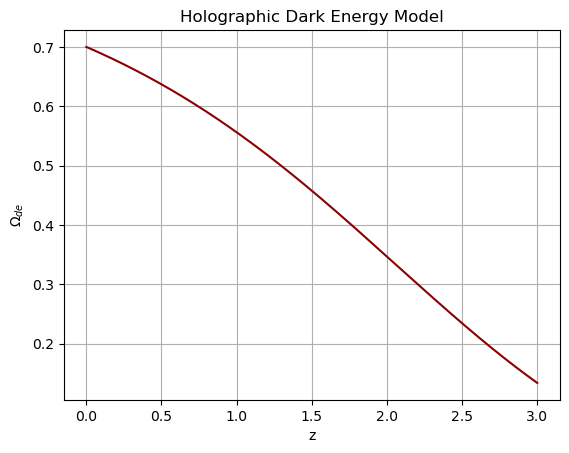

In [ ]:
'''
Holographic Dark Energy Model with interactions 
'''

#Right hand side of the equations
def RHS_a_hdei(Omega, a, ci=0.8, b2i=0.1):
    dOmegaI = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/ci)/a - (3*Omega*b2i)*(1/a)
    return dOmegaI

def fun_rooti(Omega_0, ci=0.8, Ode0=0.7, b2i=0.1):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hdei = odeint(RHS_a_hdei, Omega_0*10**(-5), a_hde, args=(ci,b2i))
    return result_a_hdei[-1] - Ode0

si = optimize.newton(fun_rooti, 1)

z = np.linspace(3,0,500)

sol_hdei =odeint(RHS_a_hdei, si*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.8,0.1))

plt.plot(z, sol_hdei,color='darkred',)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(sol_hdei[0]))

In [ ]:
1./(1+3)

0.25

In [ ]:
''' 
Shooting method to find initial values 

'''



